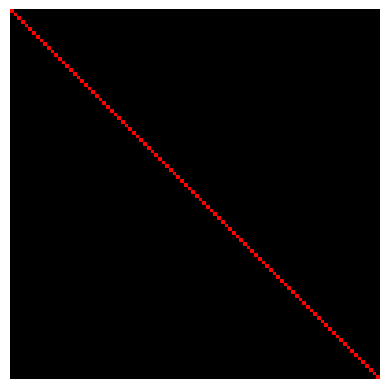

In [50]:
import numpy as np
import cv2
# diagonal
import matplotlib.pyplot as plt
height = 100
width = 100
img1 = np.zeros((width, height, 3),dtype=np.uint8)
for i in range(height):
    for j in range (width):
        if i == j: img1[i][j][0] = 255
plt.axis('off')
plt.imshow(img1)
plt.show()

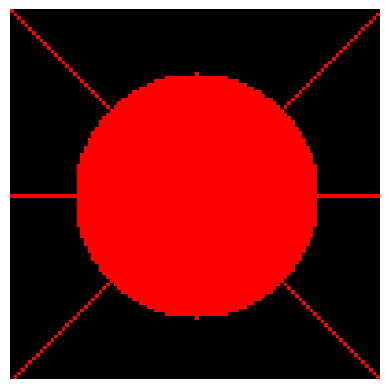

In [51]:
cv2.line(img1,(0, 0),(width, height), (255, 0, 0))
cv2.line(img1,(width, 0),(0, height), (255, 0, 0))
cv2.line(img1,(0, height // 2),(width, height // 2), (255, 0, 0))
cv2.circle(img1, (width // 2, height // 2), width // 3, (255, 0, 0), -1)
plt.axis('off')
plt.imshow(img1)
plt.show()

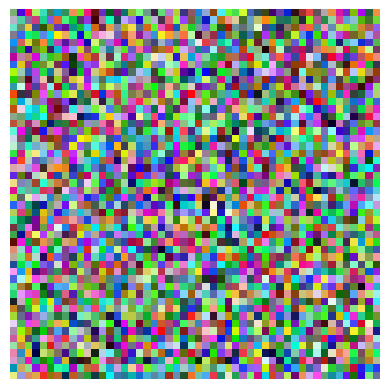

In [52]:
# random colors
img2 = np.random.randint(0, 256, (50, 50, 3), dtype=np.uint8)
plt.axis('off')
plt.imshow(img2)
plt.show()

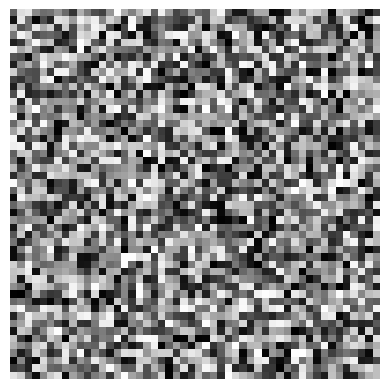

In [53]:
img3 = np.random.randint(0, 256, (50, 50), dtype=np.uint8)
plt.axis('off')
plt.imshow(img3, cmap="gray")
plt.show()

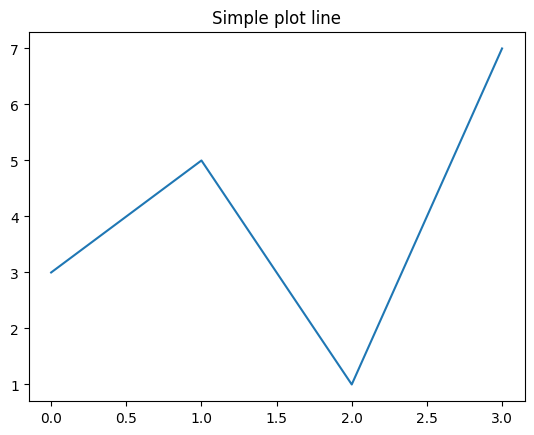

In [54]:
values = np.array([3, 5, 1, 7])
plt.plot(values)
plt.title("Simple plot line")
plt.show()

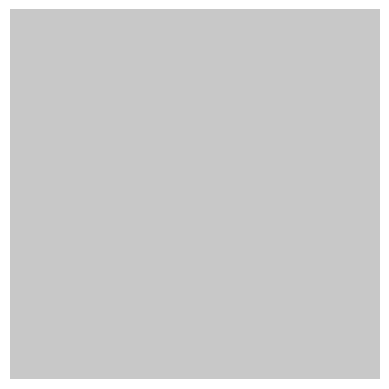

In [60]:
background = np.full((100, 100), 200, dtype=np.uint8)
plt.imshow(background, cmap="gray",vmin=0, vmax=255)
plt.axis('off')
plt.show()

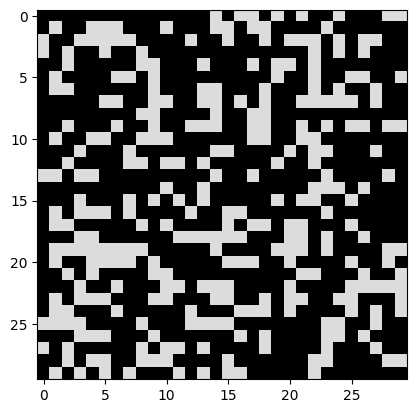

In [62]:
import random
img4 = np.full((30, 30), 255, dtype=np.uint8)
for i in range(30):
    for j in range(30):
        img4[i][j] = 0 if random.randint(0, 2) else 220
plt.imshow(img4, cmap="gray", vmin=0, vmax=255) 
plt.show()       

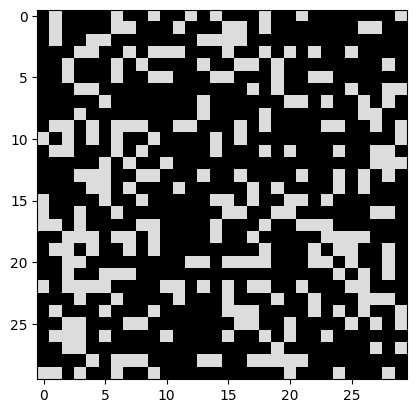

In [64]:
import time
from IPython.display import clear_output, display
img4 = np.full((30, 30), 255, dtype=np.uint8)
for t in range(20):
    for i in range(30):
        for j in range(30):
            img4[i][j] = 0 if random.randint(0, 2) else 220
    plt.imshow(img4, cmap="gray", vmin=0, vmax=255) 
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.4)